In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
water = pd.read_csv("/content/drive/MyDrive/ML_Project/water.csv");
water = pd.DataFrame(water)
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Check the dataset information

ph: The pH level of the water.

Hardness: Water hardness, a measure of mineral content.

Solids: Total dissolved solids in the water.

Chloramines: Chloramines concentration in the water.

Sulfate: Sulfate concentration in the water.

Conductivity: Electrical conductivity of the water.

Organic_carbon: Organic carbon content in the water.

Trihalomethanes: Trihalomethanes concentration in the water.

Turbidity: Turbidity level, a measure of water clarity.

Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

In [ ]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
water.shape

(3276, 10)

In [ ]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Fill the missing values

In [21]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [22]:
#################################### Imputing 'ph' value #####################################

phMean_0 = water[water['Potability'] == 0]['ph'].mean(skipna=True)
water.loc[(water['Potability'] == 0) & (water['ph'].isna()), 'ph'] = phMean_0
phMean_1 = water[water['Potability'] == 1]['ph'].mean(skipna=True)
water.loc[(water['Potability'] == 1) & (water['ph'].isna()), 'ph'] = phMean_1

##################################### Imputing 'Sulfate' value #####################################

SulfateMean_0 = water[water['Potability'] == 0]['Sulfate'].mean(skipna=True)
water.loc[(water['Potability'] == 0) & (water['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = water[water['Potability'] == 1]['Sulfate'].mean(skipna=True)
water.loc[(water['Potability'] == 1) & (water['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

################################ Imputing 'Trihalomethanes' value #####################################

TrihalomethanesMean_0 = water[water['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
water.loc[(water['Potability'] == 0) & (water['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = water[water['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
water.loc[(water['Potability'] == 1) & (water['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [7]:
water['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

# EDA

In [23]:
water.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080855,1.469958,0.000000,6.277673,7.085378,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.785123,36.145701,129.000000,317.094638,334.564290,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.395671,15.769901,0.738000,56.647656,66.303555,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


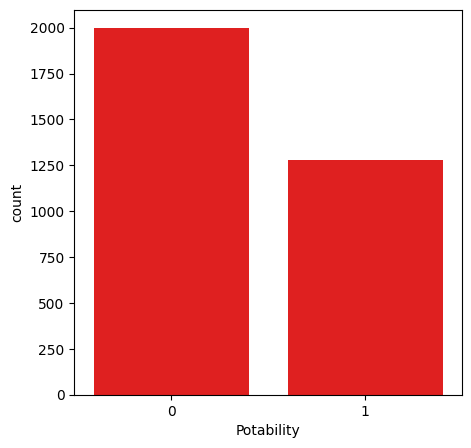

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=water, x=water["Potability"], color="red")
plt.show()

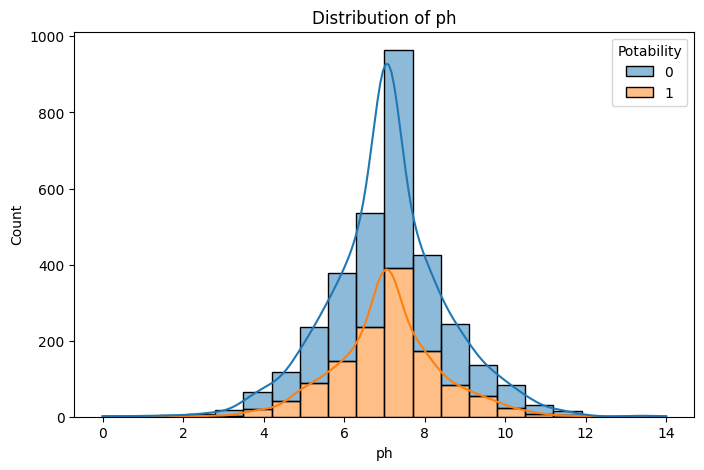

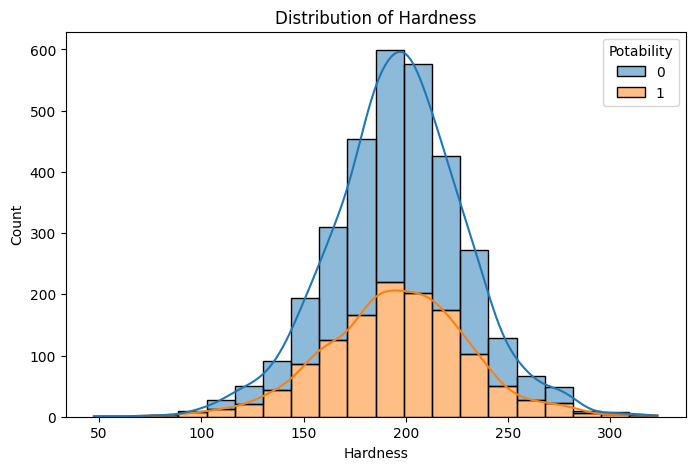

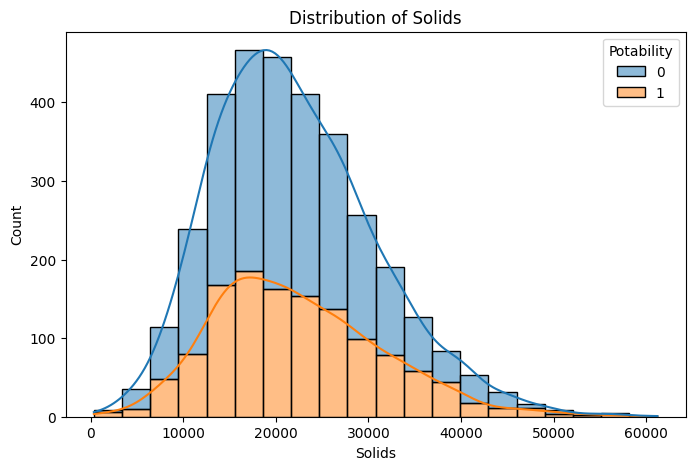

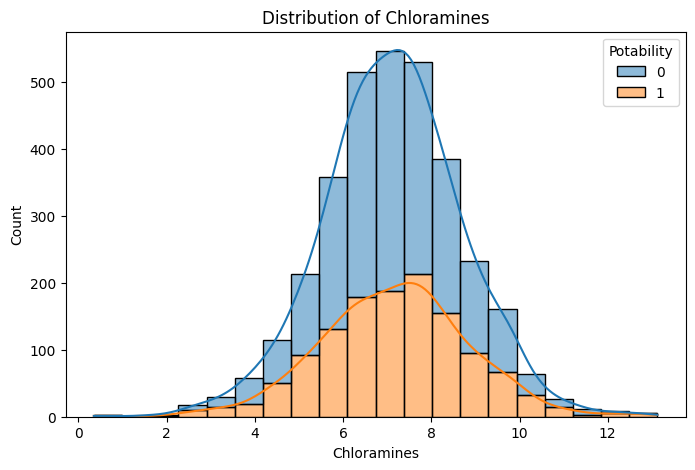

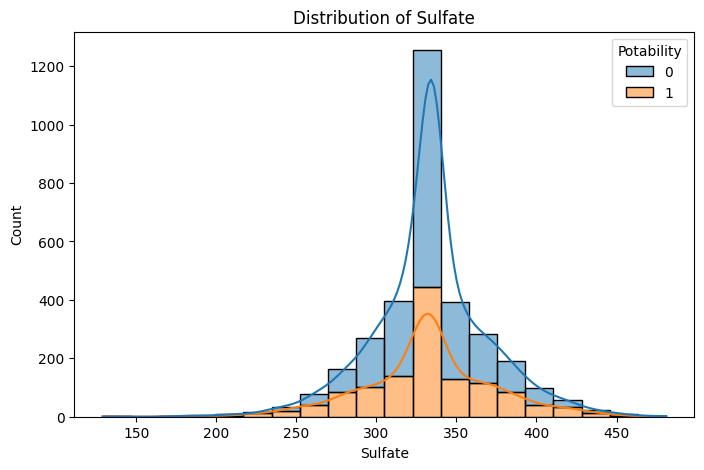

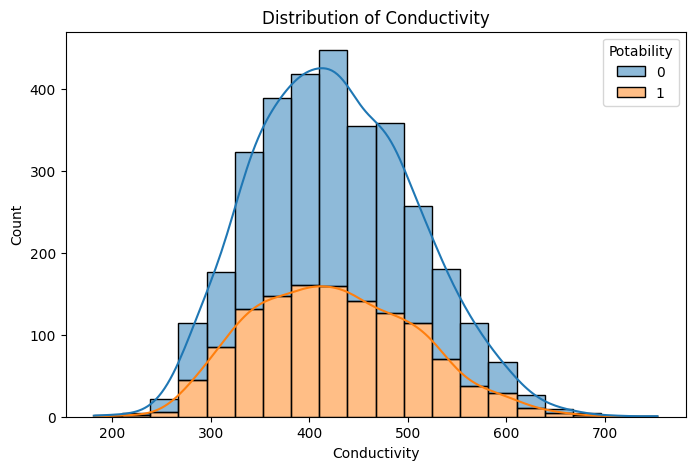

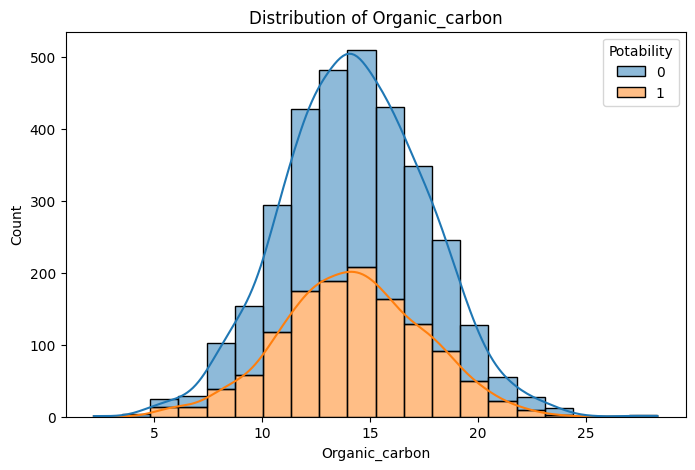

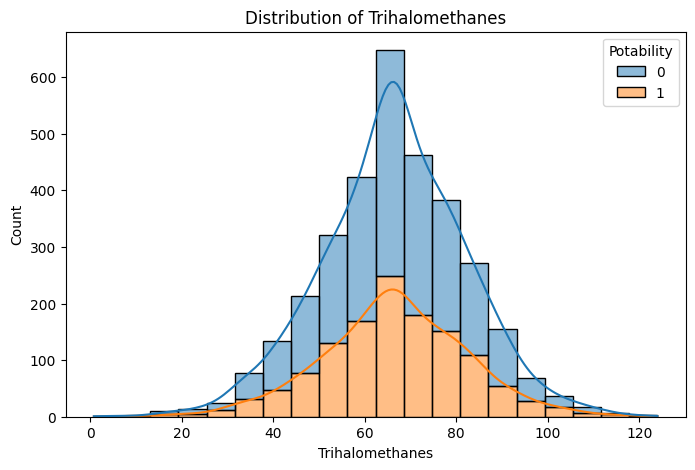

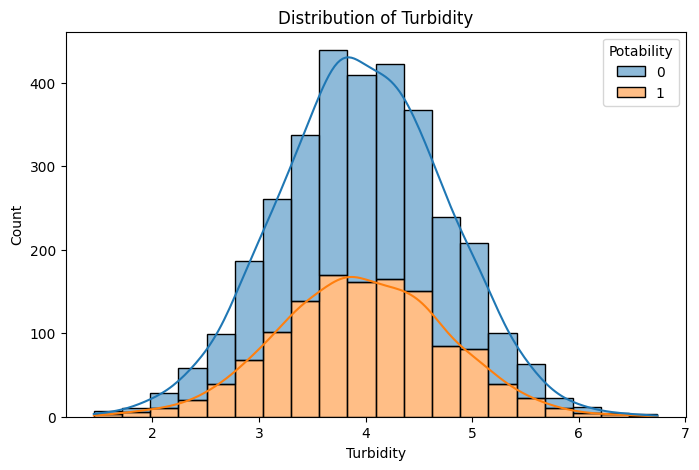

In [ ]:
columns=water.select_dtypes(exclude="object").columns
for i in range(len(columns)-1):
    plt.figure(figsize=(8,5))
    sns.histplot(data=water, x=water[columns[i]], hue="Potability", kde=True, color="red", multiple="stack", bins=20)
    plt.title(f'Distribution of {columns[i]}')
    plt.show()

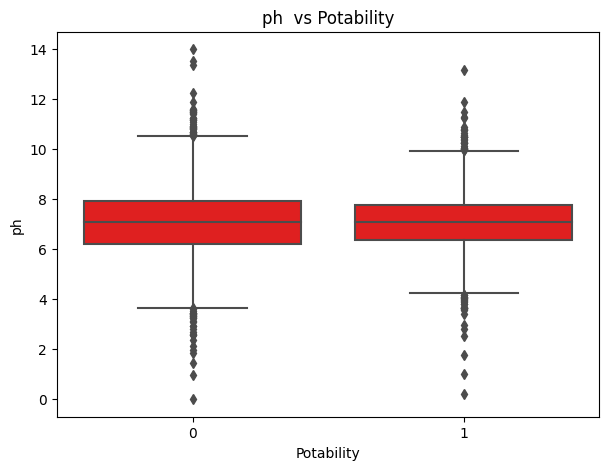

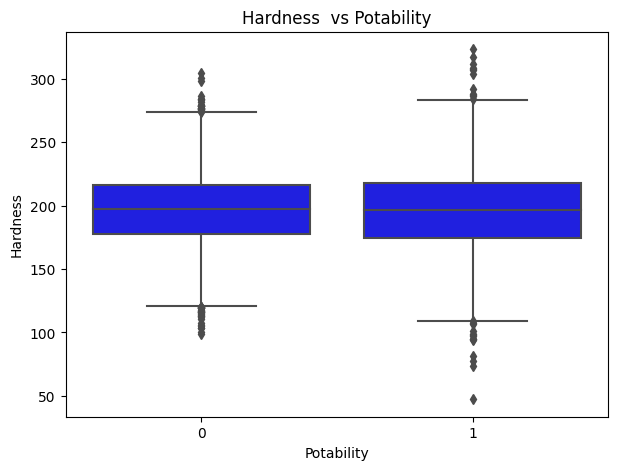

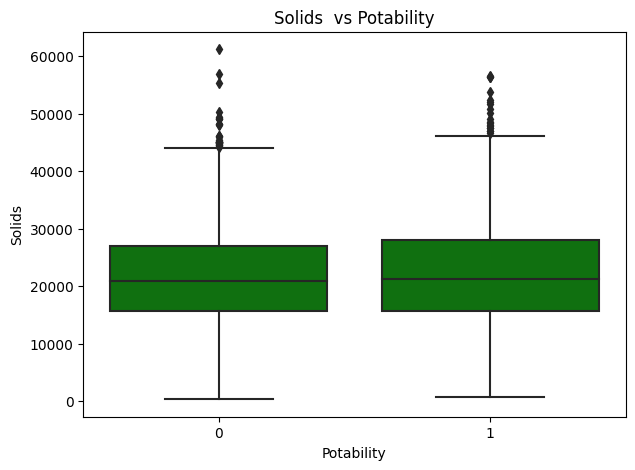

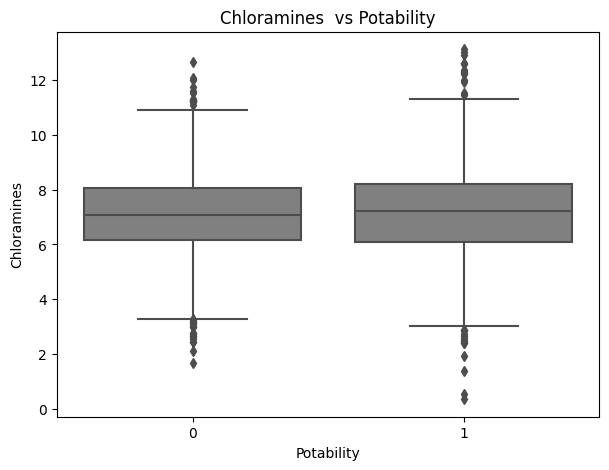

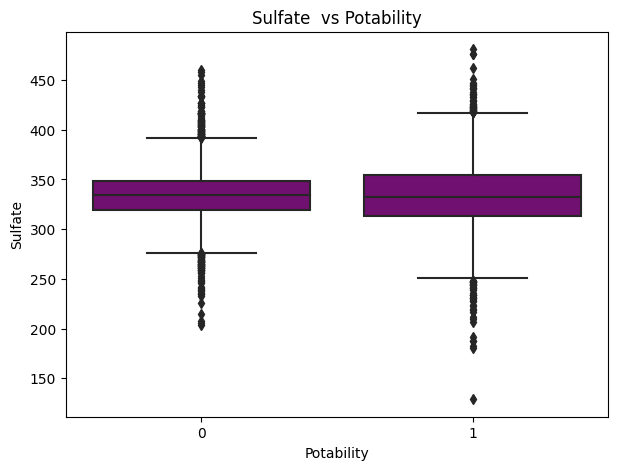

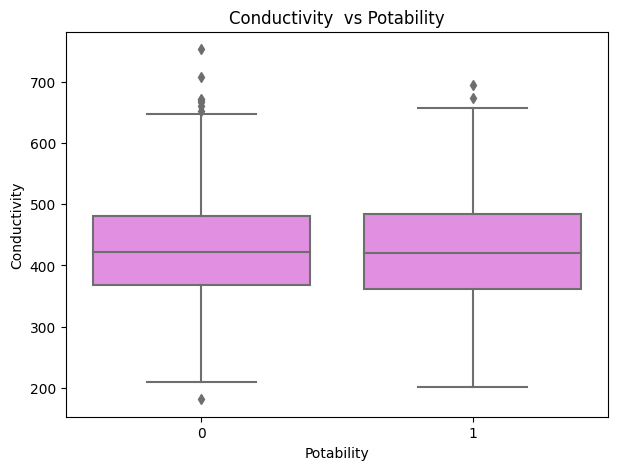

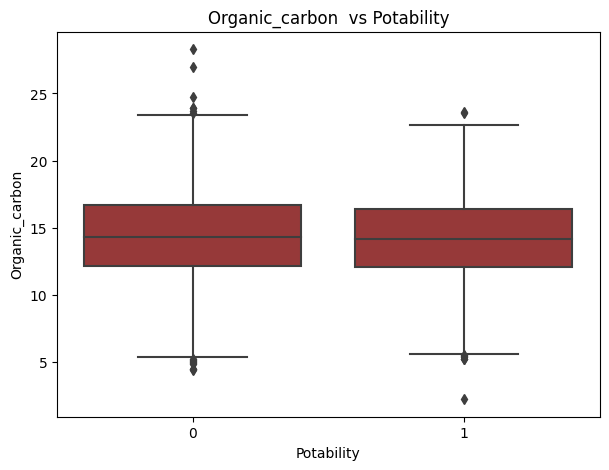

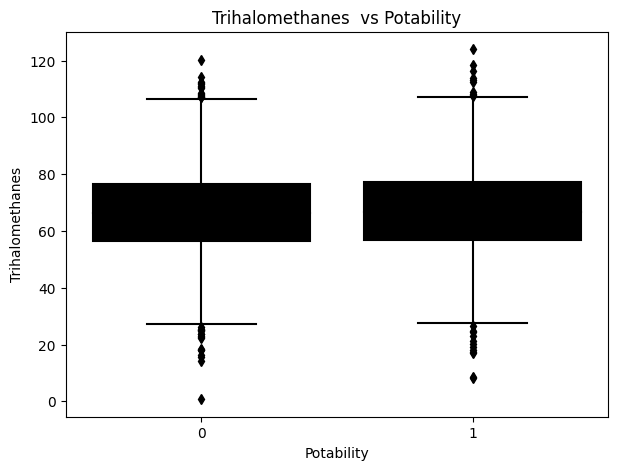

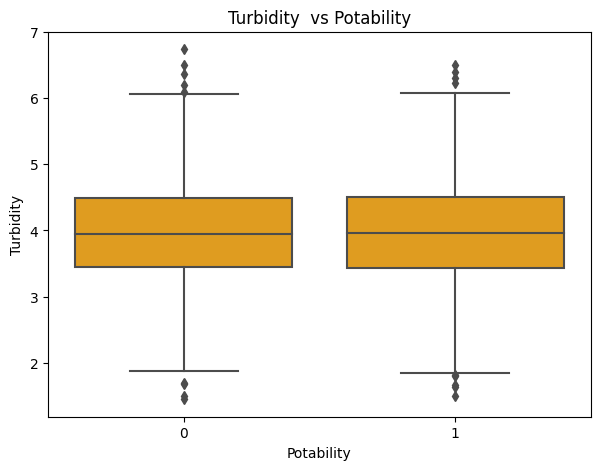

In [ ]:
colors=["red","blue","green","grey","purple","violet","brown","black", "orange"]
for i in  range(len(columns)-1):
    plt.figure(figsize=(7,5))
    sns.boxplot(data=water, x=water["Potability"], y=water[columns[i]], color=colors[i])
    plt.title(f"{columns[i]}  vs Potability")
    plt.show()

In [9]:
water.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


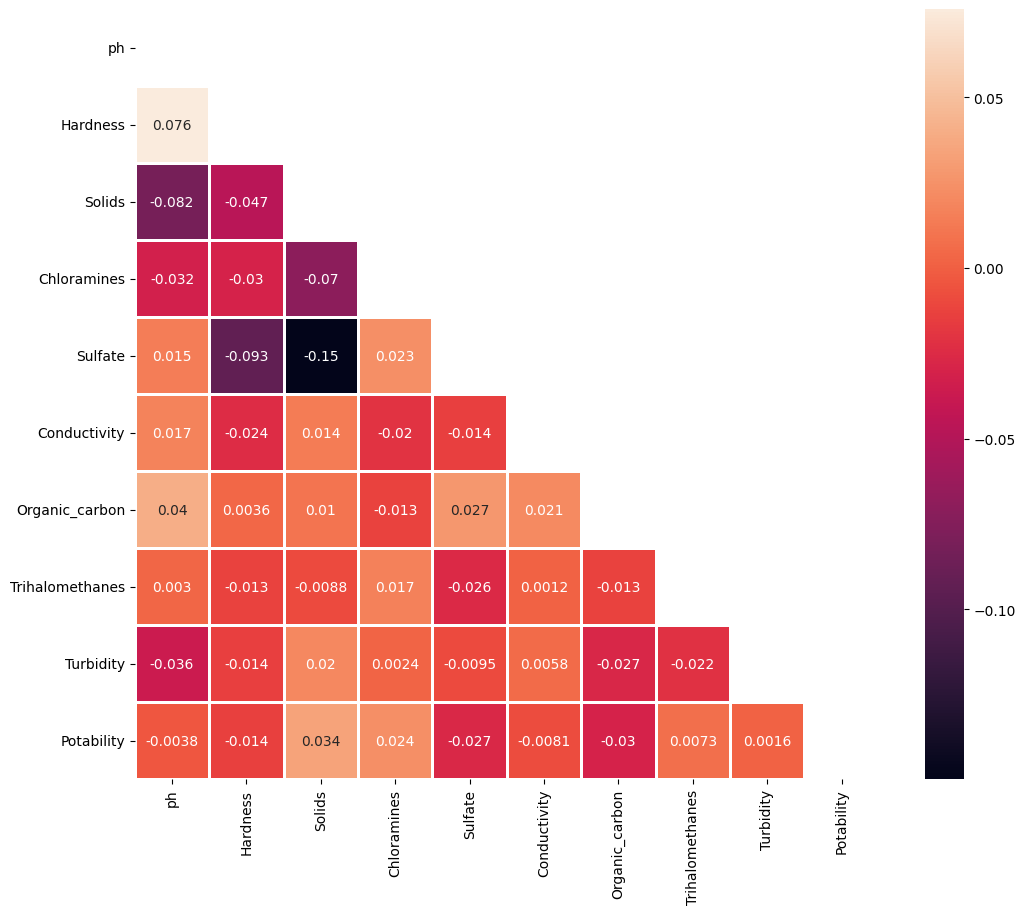

In [13]:
plt.figure(figsize=(12,10))
matrix = np.triu(water.corr())
sns.heatmap(water.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

In [17]:

sns.pairplot(water,hue = 'Potability',palette = 'Set1')

Output hidden; open in https://colab.research.google.com to view.

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

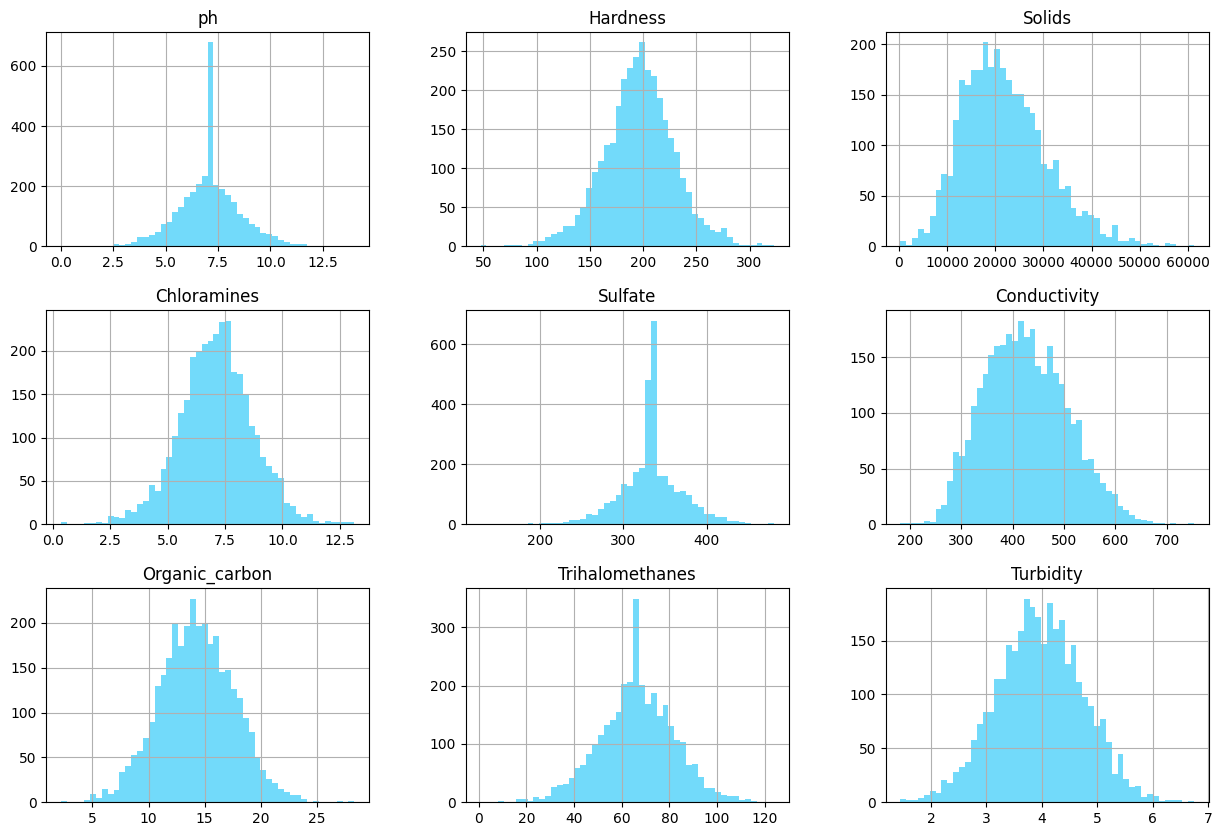

In [ ]:
water.drop('Potability',axis = 1).hist(bins = 50,figsize = (15,10),color = '#72DAFA')

# Split the data into variables(x) and target(y)

In [46]:
x = water.iloc[:,:-1]

In [47]:
y = water.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

# Standardisation of data

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[ 3.07768720e-03,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30618721e+00, -1.28629758e+00],
       [-2.28937811e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38439755e-01,  6.84217891e-01],
       [ 6.92825841e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.54883129e-03, -1.16736546e+00],
       ...,
       [ 1.59121076e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18787396e-01, -8.56006782e-01],
       [-1.32955570e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03506958e-01,  9.50797383e-01],
       [ 5.40109121e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80261909e-01, -2.12445866e+00]])

# Split the data into train data and test data

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_valtest,y_train,y_valtest = train_test_split(sc_x,y,test_size = 0.2,random_state = 42)
X_val,X_test,y_val,y_test = train_test_split(X_valtest,y_valtest,test_size = 0.5,random_state = 42)

In [50]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2620, 9)
(328, 9)
(328, 9)
(2620,)
(328,)
(328,)


# FIND Best Model

In [51]:
!pip3 install eli5

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import lightgbm
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score ,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, auc
import eli5
from eli5.sklearn import PermutationImportance


In [64]:
seed = 0
models = [ LogisticRegression(),
           DecisionTreeClassifier(random_state=seed),
           SVC(probability=True, random_state=seed),
           NuSVC(probability=True, random_state=seed),
           RandomForestClassifier(random_state=seed),
           SGDClassifier(),
           KNeighborsClassifier(),
           GaussianNB(),
           BernoulliNB(),
           LGBMClassifier(force_row_wise=True,random_state=seed),
           XGBClassifier(objective= 'binary:logistic', random_state=seed),
           GradientBoostingClassifier(random_state=seed)
 ]

In [75]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Đánh giá Permutation Importance
perm = PermutationImportance(rf, random_state=42).fit(X_val, y_val)
eli5.show_weights(perm, feature_names=x.columns.tolist())

Weight,Feature
0.1945 ± 0.0274,Sulfate
0.1136 ± 0.0301,ph
0.0311 ± 0.0198,Hardness
0.0275 ± 0.0269,Solids
0.0125 ± 0.0059,Chloramines
0.0101 ± 0.0132,Organic_carbon
0.0067 ± 0.0071,Conductivity
0.0037 ± 0.0088,Trihalomethanes
-0.0024 ± 0.0031,Turbidity


In [67]:
pip install shap

In [57]:
import shap

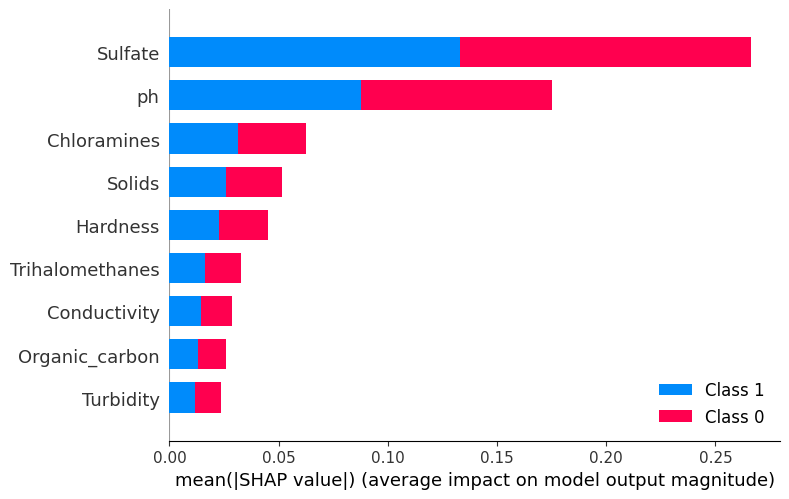

In [68]:

explainer = shap.Explainer(rf)

# Giải thích dự đoán
shap_values = explainer.shap_values(X_test)
# Hiển thị giải thích
shap.summary_plot(shap_values, X_test, x.columns.tolist())

In [69]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
scores = []
for model in models:
  print('Model: '+model.__class__.__name__ +'\n')
  scores = []
  for train_index, val_index in kf.split(sc_x):
        X_train, X_val = sc_x[train_index], sc_x[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model.fit(X_train, y_train)
        score = model.score(X_val, y_val)
        scores.append(score)
  for i, score in enumerate(scores):
        print(f"Fold {i+1} Score: {score}")
  mean_score = sum(scores) / len(scores)
  print(f"Mean Score: {mean_score}\n")

Model: LogisticRegression

Fold 1 Score: 0.760670731707317
Fold 2 Score: 0.5114503816793893
Fold 3 Score: 0.6396946564885496
Fold 4 Score: 0.6320610687022901
Fold 5 Score: 0.5145038167938931
Mean Score: 0.6116761310742879

Model: DecisionTreeClassifier

Fold 1 Score: 0.7057926829268293
Fold 2 Score: 0.683969465648855
Fold 3 Score: 0.6977099236641221
Fold 4 Score: 0.7022900763358778
Fold 5 Score: 0.7419847328244275
Mean Score: 0.7063493762800224

Model: SVC

Fold 1 Score: 0.7332317073170732
Fold 2 Score: 0.5755725190839694
Fold 3 Score: 0.6793893129770993
Fold 4 Score: 0.6351145038167939
Fold 5 Score: 0.6106870229007634
Mean Score: 0.6467990132191399

Model: NuSVC

Fold 1 Score: 0.6661585365853658
Fold 2 Score: 0.5816793893129771
Fold 3 Score: 0.6091603053435114
Fold 4 Score: 0.5679389312977099
Fold 5 Score: 0.601526717557252
Mean Score: 0.6052927760193633

Model: RandomForestClassifier

Fold 1 Score: 0.7957317073170732
Fold 2 Score: 0.7374045801526717
Fold 3 Score: 0.7908396946564885
F

In [78]:
seed = 0
models = [
           RandomForestClassifier(random_state=seed),
           LGBMClassifier(force_row_wise=True,random_state=seed),
           GradientBoostingClassifier(random_state=seed)
 ]

In [79]:
for model in models:
  model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 960, number of negative: 1661
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366272 -> initscore=-0.548242
[LightGBM] [Info] Start training from score -0.548242


Model: RandomForestClassifier

Accuracy score:  0.7755725190839695
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       337
           1       0.90      0.61      0.72       318

    accuracy                           0.78       655
   macro avg       0.81      0.77      0.77       655
weighted avg       0.80      0.78      0.77       655



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


<Figure size 800x600 with 0 Axes>

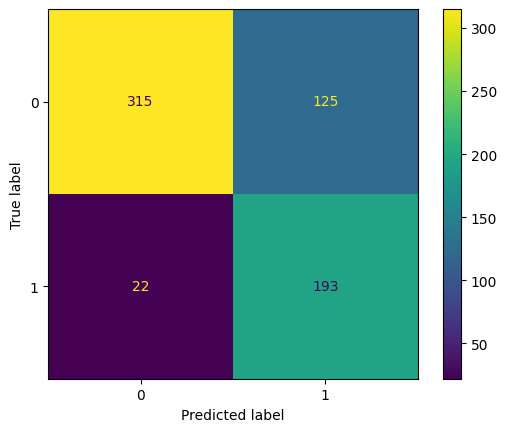

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Model: LGBMClassifier

Accuracy score:  0.7770992366412214
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81       337
           1       0.86      0.64      0.74       318

    accuracy                           0.78       655
   macro avg       0.80      0.77      0.77       655
weighted avg       0.79      0.78      0.77       655



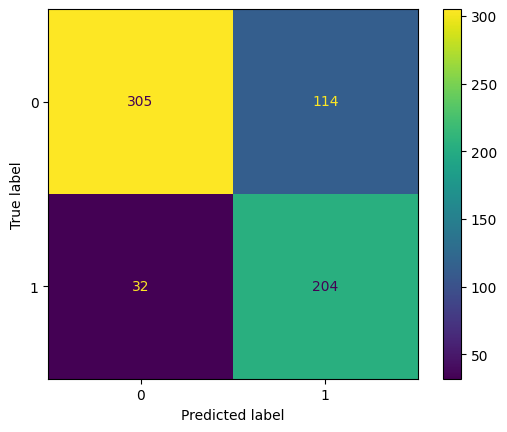

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Model: GradientBoostingClassifier

Accuracy score:  0.7526717557251908
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.94      0.80       337
           1       0.90      0.55      0.68       318

    accuracy                           0.75       655
   macro avg       0.80      0.75      0.74       655
weighted avg       0.79      0.75      0.74       655



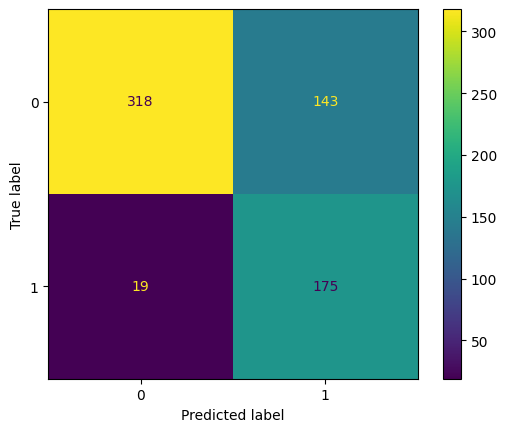

In [82]:
performance_df = pd.DataFrame(columns=['Classifier', 'Accuracy','ROC_AUC', 'Precision', 'Recall', 'F1 Score'])
plt.figure(figsize=(8, 6))
for model in models:
  y_pred = model.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1 = f1_score(y_val, y_pred, average='weighted')

  fpr, tpr, thresholds = roc_curve(y_val, y_pred)
  roc_auc = auc(fpr, tpr)

  performance_df = performance_df.append({'Classifier': model.__class__.__name__ , 'Accuracy': accuracy,'ROC_AUC': roc_auc,'Precision': precision, 'Recall': recall,'F1 Score': f1}, ignore_index=True)
  print('Model: '+model.__class__.__name__ +'\n')
  print('Accuracy score: ', accuracy_score(y_val,y_pred))
  print('-'*35)
  print('Classification Report:\n',classification_report(y_val,y_pred))
  ConfusionMatrixDisplay.from_predictions(y_pred, y_val)
  plt.show()


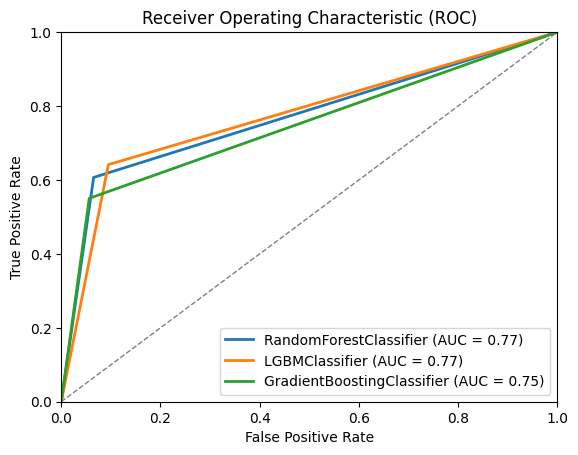

In [83]:
for model in models:
  y_pred = model.predict(X_val)

  fpr, tpr, thresholds = roc_curve(y_val, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model.__class__.__name__, roc_auc))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [84]:
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
performance_df

,Classifier,Accuracy,ROC_AUC,Precision,Recall,F1 Score
1,LGBMClassifier,0.777099,0.773277,0.794186,0.777099,0.772692
0,RandomForestClassifier,0.775573,0.770818,0.804155,0.775573,0.768763
2,GradientBoostingClassifier,0.752672,0.746967,0.792855,0.752672,0.741938


In [85]:
from sklearn.model_selection import GridSearchCV


# RandomForest

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier

Accuracy score:  0.8262195121951219
-----------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.89       220
           1       1.00      0.47      0.64       108

    accuracy                           0.83       328
   macro avg       0.90      0.74      0.76       328
weighted avg       0.86      0.83      0.81       328



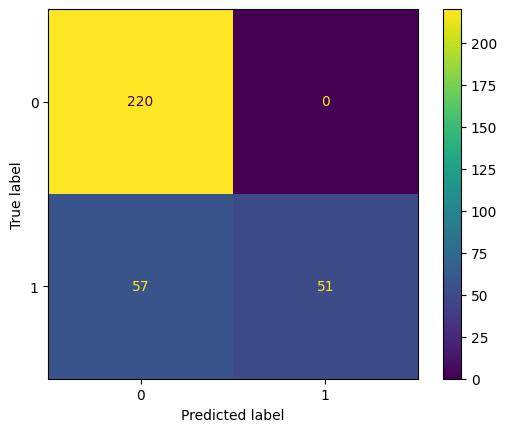

In [86]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)

print('\n'+best_rf.__class__.__name__+'\n')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('-'*35)
print('Classification Report:\n',classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

# Ligth Gradient Boosting

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
[LightGBM] [Info] Number of positive: 960, number of negative: 1661
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2621, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366272 -> initscore=-0.548242
[LightGBM] [Info] Start training from score -0.548242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

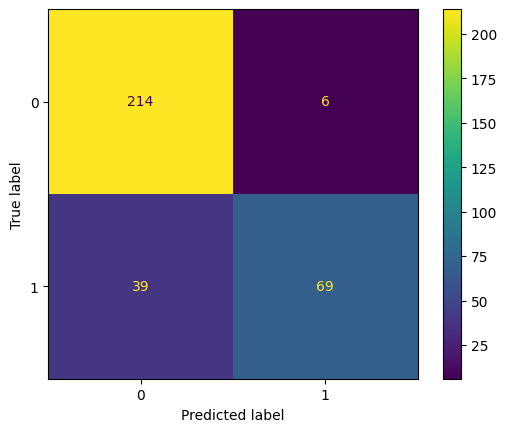

In [87]:
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, -1],  # -1 tức là không giới hạn độ sâu
    'min_child_samples': [20, 30, 50],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}
lgb = LGBMClassifier(random_state=42)

grid_search = GridSearchCV(lgb,param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_lgb = grid_search.best_estimator_
best_lgb.fit(X_train,y_train)
y_pred = best_lgb.predict(X_test)

print('\n'+best_lgb.__class__.__name__+'\n')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('-'*35)
print('Classification Report:\n',classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [89]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

best_gb = grid_result.best_estimator_
best_gb.fit(X_train,y_train)
y_pred = best_gb.predict(X_test)

print('\n'+best_gb.__class__.__name__+'\n')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('-'*35)
print('Classification Report:\n',classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

NameError: ignored